In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fraud_train_path = ('/content/drive/MyDrive/fraudTrain.csv')
train_data = pd.read_csv(fraud_train_path)

In [ ]:
pd.options.display.max_columns = None
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
fraud_test_path = ('/content/drive/MyDrive/fraudTest.csv')
test_data = pd.read_csv(fraud_test_path)

In [ ]:
pd.options.display.max_columns = None
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
train_data.shape

(1296675, 23)

In [ ]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
test_data.shape

(555719, 23)

In [ ]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
test_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
drop_col=['Unnamed: 0','trans_num','cc_num','merchant','first','last','street','zip','unix_time']
train_data.drop(columns=drop_col,inplace=True)
test_data.drop(columns=drop_col,inplace=True)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   category               1296675 non-null  object 
 2   amt                    1296675 non-null  float64
 3   gender                 1296675 non-null  object 
 4   city                   1296675 non-null  object 
 5   state                  1296675 non-null  object 
 6   lat                    1296675 non-null  float64
 7   long                   1296675 non-null  float64
 8   city_pop               1296675 non-null  int64  
 9   job                    1296675 non-null  object 
 10  dob                    1296675 non-null  object 
 11  merch_lat              1296675 non-null  float64
 12  merch_long             1296675 non-null  float64
 13  is_fraud               1296675 non-null  int64  
dtypes: float64(5), int

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   category               555719 non-null  object 
 2   amt                    555719 non-null  float64
 3   gender                 555719 non-null  object 
 4   city                   555719 non-null  object 
 5   state                  555719 non-null  object 
 6   lat                    555719 non-null  float64
 7   long                   555719 non-null  float64
 8   city_pop               555719 non-null  int64  
 9   job                    555719 non-null  object 
 10  dob                    555719 non-null  object 
 11  merch_lat              555719 non-null  float64
 12  merch_long             555719 non-null  float64
 13  is_fraud               555719 non-null  int64  
dtypes: float64(5), int64(2), object(7)
m

In [ ]:
def dateTimeAgeProcessing(X):
    X['trans_date_trans_time']=pd.to_datetime(X['trans_date_trans_time'])
    X['trans_date']=X['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
    X['trans_date']=pd.to_datetime(X['trans_date'])
    X['dob']=pd.to_datetime(X['dob'])

    #Calculate Age of each transaction
    X["age"] = (X["trans_date"] - X["dob"]).dt.days //365
    X['trans_month']=X['trans_date'].dt.month
    X['trans_year']=X['trans_date'].dt.year
    return X

In [ ]:
fraudTrain_data = dateTimeAgeProcessing(train_data)
fraudTest_data = dateTimeAgeProcessing(test_data)

In [ ]:
fraudTrain_data['gender']=fraudTrain_data['gender'].apply(lambda x : 1 if x=='M' else 0)
fraudTest_data['gender']=fraudTest_data['gender'].apply(lambda x : 1 if x=='M' else 0)
fraudTrain_data['gender']

0          0
1          0
2          1
3          1
4          1
          ..
1296670    1
1296671    1
1296672    1
1296673    1
1296674    1
Name: gender, Length: 1296675, dtype: int64

In [ ]:
fraudTrain_data['gender']=fraudTrain_data['gender'].astype(int)
fraudTest_data['gender']=fraudTest_data['gender'].astype(int)
fraudTest_data['gender']

0         1
1         0
2         0
3         1
4         1
         ..
555714    1
555715    1
555716    0
555717    1
555718    1
Name: gender, Length: 555719, dtype: int64

In [ ]:
fraudTrain_data['lat_dis']=abs(fraudTrain_data['lat']-fraudTrain_data['merch_lat'])
fraudTrain_data['long_dis']=abs(fraudTrain_data['long']-fraudTrain_data['merch_long'])

In [ ]:
fraudTest_data['lat_dis']=abs(fraudTest_data['lat']-fraudTest_data['merch_lat'])
fraudTest_data['long_dis']=abs(fraudTest_data['long']-fraudTest_data['merch_long'])

In [ ]:
fraudTrain_data['category'].head(10)

0         misc_net
1      grocery_pos
2    entertainment
3    gas_transport
4         misc_pos
5    gas_transport
6      grocery_net
7    gas_transport
8         misc_pos
9      grocery_pos
Name: category, dtype: object

In [ ]:
fraudTrain_data['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [ ]:
fraudTrain_data=pd.get_dummies(fraudTrain_data,columns=['category'])
fraudTest_data=pd.get_dummies(fraudTest_data,columns=['category'])

In [ ]:
fraudTrain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 33 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   trans_date_trans_time    1296675 non-null  datetime64[ns]
 1   amt                      1296675 non-null  float64       
 2   gender                   1296675 non-null  int64         
 3   city                     1296675 non-null  object        
 4   state                    1296675 non-null  object        
 5   lat                      1296675 non-null  float64       
 6   long                     1296675 non-null  float64       
 7   city_pop                 1296675 non-null  int64         
 8   job                      1296675 non-null  object        
 9   dob                      1296675 non-null  datetime64[ns]
 10  merch_lat                1296675 non-null  float64       
 11  merch_long               1296675 non-null  float64       
 12  

In [ ]:
fraudTrain_data = fraudTrain_data.drop(columns=['city','trans_date_trans_time','state','job','merch_lat','merch_long','lat','long','dob','trans_date'])
fraudTest_data = fraudTest_data.drop(columns=['city','trans_date_trans_time','state','job','merch_lat','merch_long','lat','long','dob','trans_date'])

In [ ]:
fraudTrain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  int64  
 2   city_pop                 1296675 non-null  int64  
 3   is_fraud                 1296675 non-null  int64  
 4   age                      1296675 non-null  int64  
 5   trans_month              1296675 non-null  int64  
 6   trans_year               1296675 non-null  int64  
 7   lat_dis                  1296675 non-null  float64
 8   long_dis                 1296675 non-null  float64
 9   category_entertainment   1296675 non-null  uint8  
 10  category_food_dining     1296675 non-null  uint8  
 11  category_gas_transport   1296675 non-null  uint8  
 12  category_grocery_net     1296675 non-null  uint8  
 13  category_grocery_pos     1296675 non-null 

In [ ]:
fraudTest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   amt                      555719 non-null  float64
 1   gender                   555719 non-null  int64  
 2   city_pop                 555719 non-null  int64  
 3   is_fraud                 555719 non-null  int64  
 4   age                      555719 non-null  int64  
 5   trans_month              555719 non-null  int64  
 6   trans_year               555719 non-null  int64  
 7   lat_dis                  555719 non-null  float64
 8   long_dis                 555719 non-null  float64
 9   category_entertainment   555719 non-null  uint8  
 10  category_food_dining     555719 non-null  uint8  
 11  category_gas_transport   555719 non-null  uint8  
 12  category_grocery_net     555719 non-null  uint8  
 13  category_grocery_pos     555719 non-null  uint8  
 14  cate

In [ ]:
fraudTrain_data['category_entertainment'].head(10)

0    0
1    0
2    1
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: category_entertainment, dtype: uint8

In [ ]:
x_train=fraudTrain_data.drop('is_fraud',axis=1)
y_train=fraudTrain_data['is_fraud']
x_test=fraudTest_data.drop('is_fraud',axis=1)
y_test=fraudTest_data['is_fraud']

In [ ]:
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
accuracy_logistic = accuracy_score(y_test, y_pred_lr)
accuracy_logistic
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print(accuracy_logistic)


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

0.9956164896287513


In [ ]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nClassification Report for Random Forest Classifier:\n", classification_report(y_test, y_pred_rf))
print(accuracy_logistic)


Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.82      0.62      0.71      2145

    accuracy                           1.00    555719
   macro avg       0.91      0.81      0.85    555719
weighted avg       1.00      1.00      1.00    555719

0.9956164896287513


In [ ]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("\nClassification Report for Decision Tree Classifier:\n", classification_report(y_test, y_pred_dt))
print(accuracy_dt)


Classification Report for Decision Tree Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.55      0.61      0.58      2145

    accuracy                           1.00    555719
   macro avg       0.77      0.80      0.79    555719
weighted avg       1.00      1.00      1.00    555719

0.9965468159267543


In [ ]:
final_data=pd.DataFrame({'Models':['LR','RF','DT'],
                        'Accuracy':[accuracy_score(y_test,y_pred_lr),
                              accuracy_score(y_test,y_pred_rf),
                              accuracy_score(y_test,y_pred_dt)]})

In [ ]:
final_data

,Models,Accuracy
0,LR,0.995616
1,RF,0.998003
2,DT,0.996547


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Models').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Models')):
  _plot_series(series, series_name, i)
  fig.legend(title='Models', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Models')):
  _plot_series(series, series_name, i)
  fig.legend(title='Models', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['Models'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='Models', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Models'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Accuracy', y='Models', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<Axes: xlabel='Models', ylabel='Accuracy'>

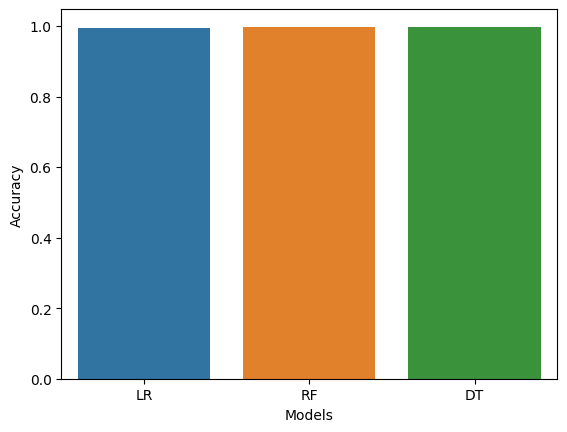

In [ ]:
sns.barplot(x=final_data['Models'],y=final_data['Accuracy'])